In [1]:
## Let's import all packages first
import matplotlib.pyplot as pyplot
import pandas
import numpy as np
import functools

In [2]:
# Load CSV and display it
perceptions = pandas.read_csv("VOCS2016-2017-HOUSEHOLD/VOCS2016-2017-HOUSEHOLD_F1.csv")
perceptions

,uqno,prov,Q21topiccrime,Q21bHowLong,Q2211Murder,Q2212StrRob,Q2213HomeRob,Q2214BussRob,Q2215Hijack,Q2216Assault,...,Q2012Who,Q2013Recovered,Q2014Secure,Q2015Measures,Q2015Awareness,Q2015Gun,Q2015Weapon,Q2015Other,metro_code,Unnamed: 674
0,160100720000002601,1,2,3,2,2,2,2,2,1,...,9,9,9,9,9,9,9,9,1,NaN
1,160100720000006301,1,2,2,2,2,2,2,2,2,...,9,9,9,9,9,9,9,9,1,NaN
2,160100720000010001,1,2,1,2,2,2,2,2,2,...,9,9,9,9,9,9,9,9,1,NaN
3,160101220000003001,1,2,3,2,2,2,2,2,1,...,9,9,9,9,9,9,9,9,1,NaN
4,160101220000006301,1,2,3,2,2,2,2,2,1,...,9,9,9,9,9,9,9,9,1,NaN
5,160101220000009601,1,2,3,2,2,2,2,2,2,...,9,9,9,9,9,9,9,9,1,NaN
6,160101220000016201,1,2,3,2,2,2,2,2,2,...,9,9,9,9,9,9,9,9,1,NaN
7,160101430000000901,1,2,3,2,2,2,2,2,2,...,9,9,9,9,9,9,9,9,1,NaN
8,160101430000003201,1,1,3,2,2,2,2,2,1,...,9,9,9,9,9,9,9,9,1,NaN
9,160101430000005501,1,2,3,2,2,2,2,2,2,...,9,9,9,9,9,9,9,9,1,NaN


## 21 095 records in total

### Let's see how many records we have for Gauteng...

In [3]:
# let's visualise CSV as table with +named colums+
provinces = perceptions["prov"].reset_index(name="provinces")
gauteng = perceptions[perceptions.prov == 7]
len(gauteng)

5243

### 5 243 records in total for Gauteng...

#### Now let's count the records for the individual metros in Gauteng to double check

In [4]:
# Function to return the number of records in any given metro
def metro_count(region, metro_code):
    return len(region[region.metro_code == metro_code])

# Let's define a dictionary with Gauteng metro codes
gauteng_metros = {"GP - Non Metro": 12,
          "GP - Ekurhuleni": 13,
          "GP - City of Johannesburg": 14,
          "GP - City of Tshwane": 15}

In [5]:
# Now let's iterate through all the Gauteng codes and display the number of records for each metro
for metro in gauteng_metros:
    print(metro + ": " + str(metro_count(gauteng, gauteng_metros[metro])))

GP - Non Metro: 867
GP - Ekurhuleni: 1389
GP - City of Johannesburg: 1847
GP - City of Tshwane: 1140


Everything corresponds with what's recorded in the documentation that came with the data.

Now let's visualize the data...

## General thinking about crime

In answer to the question:

### Has the topic of crime come up in any conversation you had with your family, friends or colleagues in the past two weeks?

In [6]:
# First, let's define a funtion to return the result to any other topic we might have in future
def freqCount(region, topic_code, response_code):
    return region.groupby(topic_code).size().reset_index(name = 'frequency')['frequency'][response_code]

# Constants that represent in which row to find the required response in the dataframe
YES = 0
NO = 1
UNS = 2

# While we at it, let's define a function to format our percentage values for autopct in our pie charts
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val=int((pct*total/100.0)+0.5)
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#### So now, to answer the question... "Has the topic of crime come up in any conversation you had with your family, friends or colleagues in the past two weeks?"...

In [7]:
freqCount(gauteng, "Q21topiccrime", YES)

2587

###### ...2 587 people answered "yes"

#### This means, in Gauteng, in answer to the question " Has the topic of crime come up in any conversation you had with your family, friends or colleagues in the past two weeks?", people that answered "yes" totalled 2 587, people that answered "no" totalled 2600, and people who's response was "unspecified" totalled 56.

#### If we were to visualize this in a pie chart...

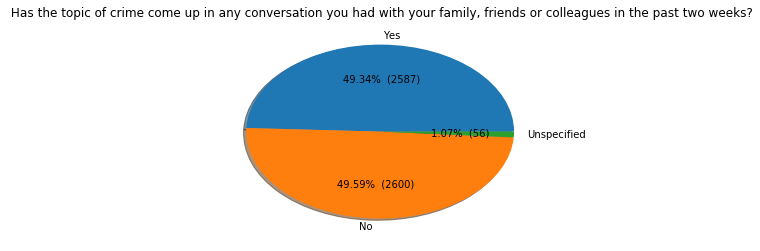

In [8]:
responses = [freqCount(gauteng, "Q21topiccrime", YES), freqCount(gauteng, "Q21topiccrime", NO), freqCount(gauteng, "Q21topiccrime", UNS)]
pyplot.pie(x = responses, labels=["Yes", "No", "Unspecified"], autopct=make_autopct(responses), shadow=True)
pyplot.title(" Has the topic of crime come up in any conversation you had with your family, friends or colleagues in the past two weeks?")
pyplot.show()

### "Which crimes occur mostly in your area?"
#### Let's see which one people answered yes to most...

In [9]:
# this list contains all the codes for the individual crimes under this topic
occur_codes = ["Q2211Murder", "Q2212StrRob", "Q2213HomeRob", "Q2214BussRob", "Q2215Hijack", "Q2216Assault", "Q2217SexAssult", 
            "Q2218ChildAbuse", "Q2219Political", "Q22110Vigilante", "Q22111BagSnatch", 
            "Q22112Bicycle", "Q22113Car", "Q22114Burglary", "Q22115Crop", "Q22116Livestock", "Q22117WhiteCollar", "Q22118damage", 
            "Q22119IDtheft", "Q22120HumanTrafficking", "Q22121DrugTrafficking", "Q22122HateCrime", "Q22123Other"]
# this list contains the labels of the crimes
crime_labels = ["Murder", "Street Robbery", "Home Roberry", "Business Robbery","Vehicle Hijacking", "Assault", "Sexual Assault", 
          "Child Abuse", "Political Violence", "Vigilantism", "Bag Snatching", "Bicycle Theft", "Vehicle Theft", "House Breaking", 
          "Crop Theft", "Livestock Theft", "White Collar", "Damage", "Id theft", "Human Trafficking", "Drug Trafficking",
          "Hate Crime", "Other Crime"]

def multiFreqCount(region, occur_codes, response):
    crime_count = []
    for topic in occur_codes:
        crime_count.append(freqCount(gauteng, topic, response))
        
    return crime_count

#### To answer the question...

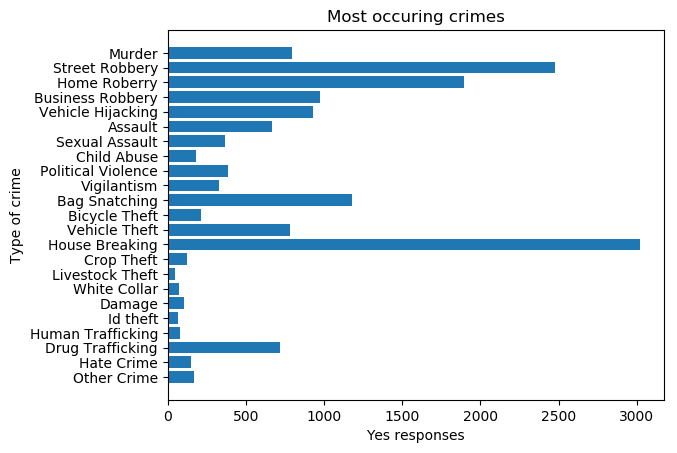

In [16]:
pyplot.rcdefaults()
fig, fc = pyplot.subplots()

# Example data
y_pos = np.arange(len(crime_labels))

fc.barh(range(len(y_pos)), multiFreqCount(gauteng, occur_codes, YES))
fc.set_yticks(y_pos)
fc.set_yticklabels(crime_labels)
fc.invert_yaxis()  # labels read top-to-bottom
fc.set_xlabel('Yes responses')
fc.set_ylabel("Type of crime")
fc.set_title('Most occuring crimes')
pyplot.show()

### As can be seen on the graph...
#### 1. Housebreaking/burglary occurs most, followed by
#### 2. Street robbery
#### 3. Home robbery
#### 4. Bag snatching
#### 5. Drug Trafficking

### To answer the question "Which crimes are you most afraid of in your area?  (which ones did people answer yes to most?)"...

#### Let's create a class to define instance objects of stats for a specific topic object, and a sort function to sort all the counts from highest count to lowest count of "yes" responses

In [18]:
class CrimeStat:
    """A simple crime-stats data class"""
    code = ""
    label = ""
    yes = 0
    no = 0
    uns = 0
    yes_percentage = 0

    # Constructor function
    def __init__(self, region, topic, label):
        self.code = topic
        self.label = label
        self.yes = freqCount(region, self.code, YES)
        self.no = freqCount(region, self.code, NO)
        self.uns = freqCount(region, self.code, UNS)
        total = (self.yes + self.no) # we're only concerned with people that submitted an answer
        self.yes_percentage = (self.yes/total*100)

    # Instance function to return a string with instance values
    def showInfo(self):
        fmt = "{:" + str(30-len(self.code)) + "}"
        returnString = "{:20}".format(self.label) + "[" + "{:}".format(self.code) + "]"
        returnString += fmt.format(" ") + "{:.2f}".format(self.yes_percentage) + "%"
        return  returnString
    
    # Static function to print out CrimeData object instance values
    def showAllInfo(stats):
        headings = "{:>9}".format("Label") + "{:>25}".format("Topic Code") + "{:>27}".format("Yes %")
        print(headings)
        for j in range(0, len(stats)):
            print("{:2}".format(str(j)) + ": " + stats[j].showInfo())

# Constants to pass the sort function to determine the sort order
ASC = False
DEC = True

def sortStats(crimeStatList, sortOrder):
    return sorted(crimeStatList, key=lambda instance: instance.yes, reverse=sortOrder)

#### Now let's use our function to answer the question, which is...
#### "Which crimes are you most afraid of in your area? (which ones did people answer yes to most?)"...

In [20]:
feared_codes = ["Q2221Murder", "Q2222StrRob", "Q2223HomeRob", "Q2224BussRob", "Q2225Hijack", "Q2226Assault", "Q2227SexAssult", 
            "Q2228ChildAbuse", "Q2229Political", "Q22210Vigilante", "Q22211BagSnatch", 
            "Q22212Bicycle", "Q22213Car", "Q22214Burglary", "Q22215Crop", "Q22216Livestock", "Q22217WhiteCollar", "Q22218damage", 
            "Q22219IDtheft", "Q22220HumanTrafficking", "Q22221DrugTrafficking", "Q22222HateCrime", "Q22223Other"]

mostFearedStats = []

for i in range(0, len(feared_codes)):
    mostFearedStats.append(CrimeStat(gauteng, feared_codes[i], crime_labels[i]))

mostFearedStats = sortStats(mostFearedStats, DEC)
#CrimeStat.showAllInfo(mostFearedStats) #print out the sorted stats for "most feared crimes"

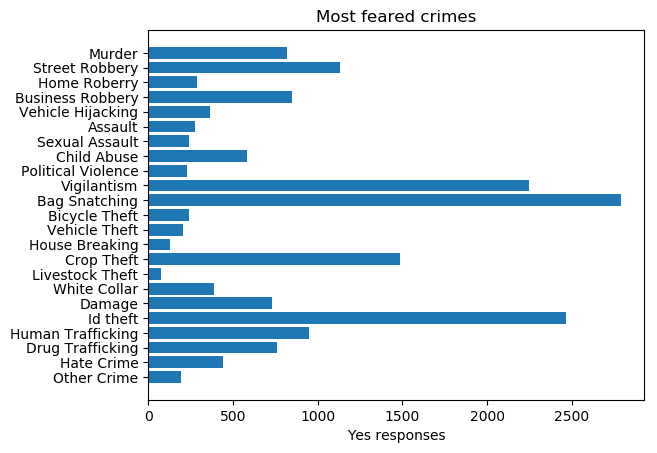

In [21]:
pyplot.rcdefaults()
fig, fc = pyplot.subplots()

y_pos = np.arange(len(crime_labels))

counts = multiFreqCount(gauteng, feared_codes, YES)

pyplot.barh(crime_labels, counts) ### This line doesn't work for some reason I haven't figured yet...
#fc.set_yticks(y_pos)
fc.set_yticklabels(crime_labels)
fc.invert_yaxis()  # labels read top-to-bottom
fc.set_xlabel('Yes responses')
fc.set_title('Most feared crimes')
pyplot.show()

In [ ]:
newg = gauteng[gauteng['Q2221Murder'] == 1]
newg['Q2221Murder']

In [ ]:
def mostFearedList(region, codes):
    theList = []
    for code in codes:
        theList.append(len(region[region[code] == 1]))
    return theList
#mostFearedList(gauteng, feared_codes)

In [ ]:
pyplot.rcdefaults()
fig, fc = pyplot.subplots()

y_pos = np.arange(len(crime_labels))

pyplot.barh(crime_labels, mostFearedList(gauteng, feared_codes)) ### This line doesn't work for some reason I haven't figured yet...
#fc.set_yticks(y_pos)
fc.set_yticklabels(crime_labels)
fc.invert_yaxis()  # labels read top-to-bottom
fc.set_xlabel('Yes responses')
fc.set_title('Most feared crimes')
pyplot.show()